In [185]:
#Importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
dataset["RowNumber"].nunique()

10000

In [188]:
dataset["CustomerId"].nunique()

10000

In [189]:
dataset["Surname"].nunique()

2932

In [190]:
dataset.shape

(10000, 14)

**Observation 1**: The columns Row Number, CustomerID and Surname can be dropped. These columns do not offer much value to our analysis.

In [191]:
dataset.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)
dataset.shape

(10000, 11)

In [192]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Observation 2**: There are no missing values in our dataset.

In [193]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [194]:
dataset["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [195]:
dataset["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [196]:
dataset["Tenure"].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [197]:
dataset["HasCrCard"].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [198]:
dataset["IsActiveMember"].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [199]:
dataset.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


<Figure size 1200x1200 with 0 Axes>

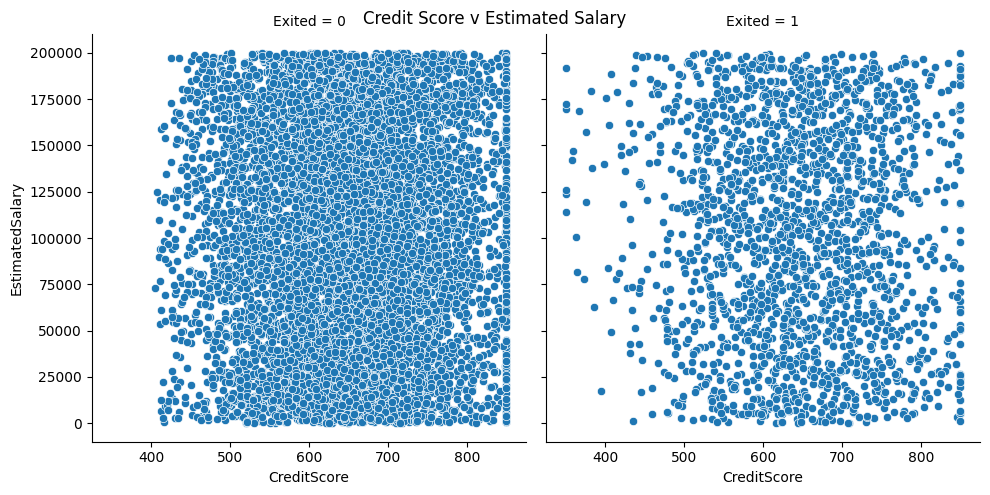

In [200]:
plt.figure(figsize=(12,12))
a = sns.relplot(x="CreditScore",y="EstimatedSalary",kind="scatter",col="Exited",data=dataset)
a.fig.suptitle("Credit Score v Estimated Salary")
plt.show()

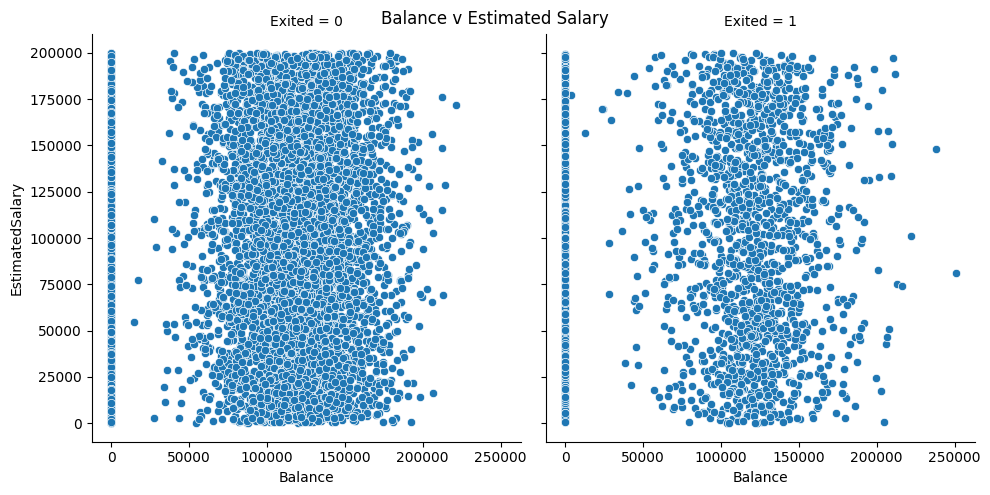

In [201]:
b = sns.relplot(x="Balance",y="EstimatedSalary",kind="scatter",col="Exited",data=dataset)
b.fig.suptitle("Balance v Estimated Salary")
plt.show()

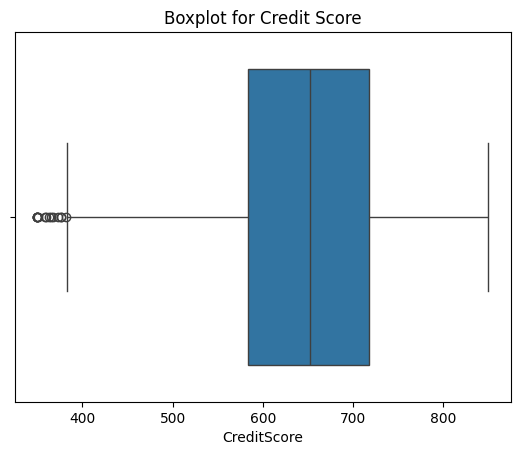

In [202]:
#Outlier Detection
sns.boxplot(x="CreditScore",data=dataset)
plt.title("Boxplot for Credit Score")
plt.show()

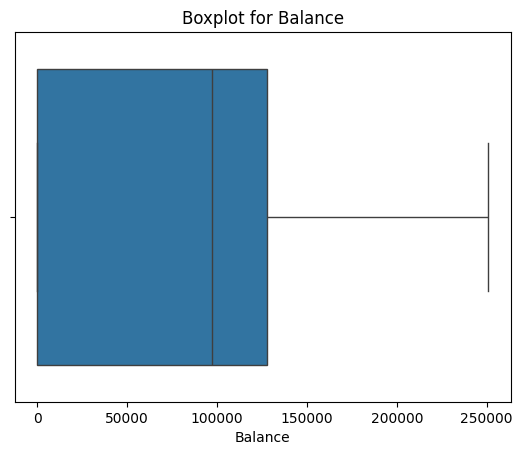

In [203]:
sns.boxplot(x="Balance",data=dataset)
plt.title("Boxplot for Balance")
plt.show()

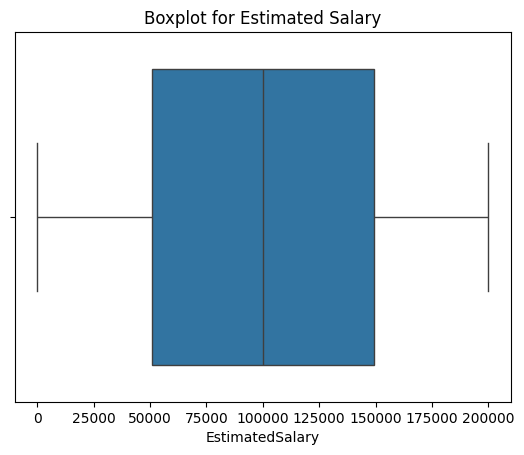

In [204]:
sns.boxplot(x="EstimatedSalary",data=dataset)
plt.title("Boxplot for Estimated Salary")
plt.show()

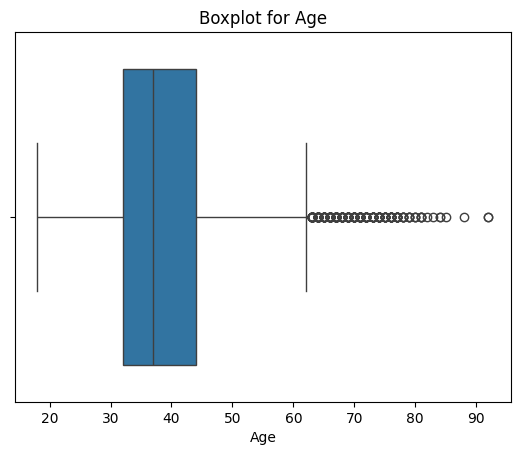

In [205]:
sns.boxplot(x="Age",data=dataset)
plt.title("Boxplot for Age")
plt.show()

**Observation 3**: There are outliers in Age and Credit Score columns.

In [206]:
q1 = dataset["Age"].quantile(0.25)
q3 = dataset["Age"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_1 = dataset[(dataset["Age"]>=min_value) & (dataset["Age"]<=max_value)]

**Observation 4**: 359 rows have been lost while removing outliers in Age column.

In [207]:
q1 = data_1["CreditScore"].quantile(0.25)
q3 = data_1["CreditScore"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data_2 = data_1[(data_1["CreditScore"]>=min_value) & (data_1["CreditScore"]<=max_value)]

**Observation 5**: 14 rows have been lost while removing outliers in Credit Score column

In [208]:
#Checking for duplicates
print(data_2.shape)
data_2.drop_duplicates(inplace=True)
print(data_2.shape)

(9627, 11)
(9627, 11)


**Observation 6**: There are no duplicate rows in our dataset.

<Axes: >

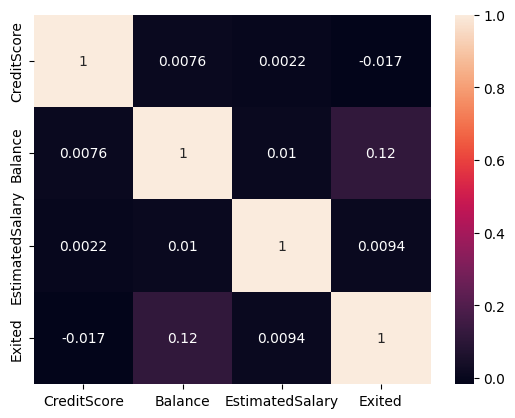

In [209]:
df = data_2[["CreditScore","Balance","EstimatedSalary","Exited"]]
sns.heatmap(df.corr(),annot=True)

-0.046587124024099785


<Axes: xlabel='CreditScore', ylabel='Density'>

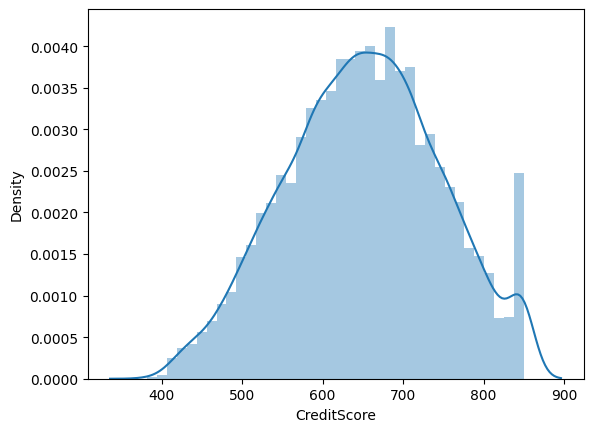

In [210]:
#Checking distributions of CreditScore, Balance and EstimatedSalary columns
print(data_2["CreditScore"].skew())
sns.distplot(data_2["CreditScore"],kde=True)

-0.14130369039090832


<Axes: xlabel='Balance', ylabel='Density'>

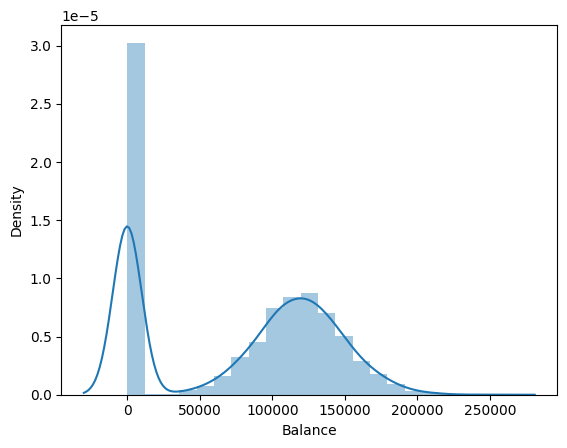

In [211]:
print(data_2["Balance"].skew())
sns.distplot(data_2["Balance"],kde=True)

-0.0005225169996114408


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

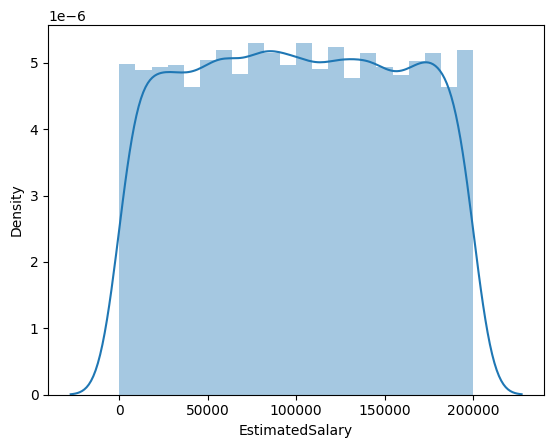

In [212]:
print(data_2["EstimatedSalary"].skew())
sns.distplot(data_2["EstimatedSalary"],kde=True)

**Observation 7**: The three columns are not highly skewed in either direction. Therefore, there will not be much affect if we apply function transformer to these columns.

In [213]:
data_2.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [214]:
#Encoding Categorical columns
data_2["Gender"] = data_2["Gender"].map({"Female":"0","Male":"1"})

In [215]:
data_2["Gender"] = data_2["Gender"].astype(int)

In [216]:
data_2.shape

(9627, 11)

In [217]:
geography_encoded = pd.get_dummies(data_2["Geography"], drop_first=True).astype(int)
data = pd.concat([data_2, geography_encoded], axis=1)

In [218]:
data.drop("Geography",axis=1,inplace=True)

In [219]:
data["Exited"].value_counts()

,count
Exited,
0,7677
1,1950


**Observation**: The dataset is imbalanced. Therefore, we will have to use imblearn to balance the dataset.

In [220]:
x = data.drop("Exited",axis=1)
y = data[["Exited"]]

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [222]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_resampled = pd.DataFrame(scaler.fit_transform(x_train_resampled), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [224]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix

In [225]:
model = Sequential()
model.add(Dense(40,activation="sigmoid",input_dim=x_train_resampled.shape[1]))
model.add(Dense(20,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")
model.fit(x_train_resampled, y_train_resampled, epochs=50)
y_test_pred_probs = model.predict(x_test)
y_train_pred_probs = model.predict(x_train_resampled)
y_test_pred = (y_test_pred_probs > 0.5).astype(int)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)
test_accuracy = accuracy_score(y_test,y_test_pred)
train_accuracy = accuracy_score(y_train_resampled,y_train_pred)
print("Test accuracy is: ",test_accuracy)
print("Train accuracy is: ",train_accuracy)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6627
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4785
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4566
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4583
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4604
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4470
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4571
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4405
Epoch 9/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4449
Epoch 10/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4311
Epoch 11/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4323
Epoch 12/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4180
Epoch 13/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4083
Epoch 14/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4101
Epoch 15/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

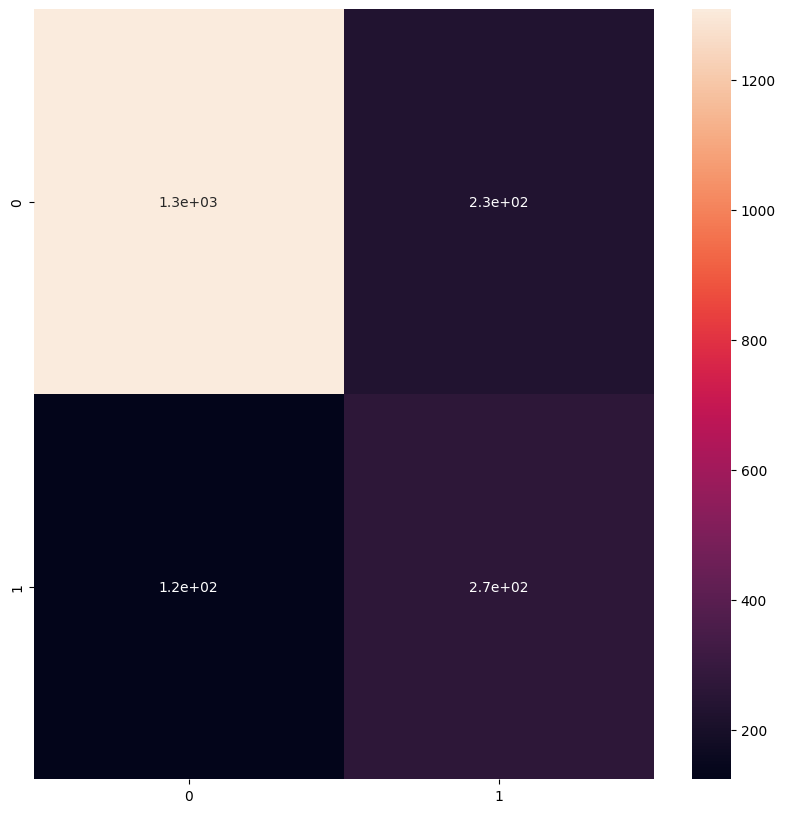

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True)
plt.show()

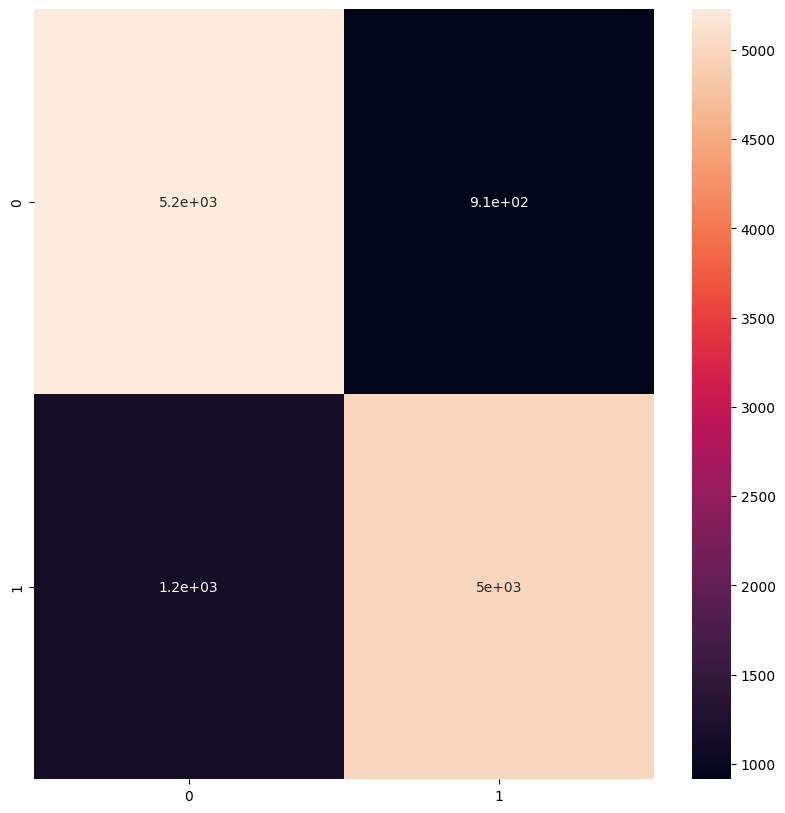

In [227]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_train_resampled, y_train_pred),annot=True)
plt.show()